# ML1 Lab

Welcome to ML1!   This lab will use the famous Iris data set to introduce you to common python ML tools.  You will explore, analyze, and then build and tune models to predict flower species.   Click [here](https://en.wikipedia.org/wiki/Iris_flower_data_set) for more about the Iris dataset.

## About the tools

Scientific python uses a set of libraries that build on one another.  Here's a one-line intro to each, from  lowest level to highest.

* __NumPy__:      fast vector and matrix math
* __pandas__:     Tools to read/write/manipulate data with a structure called the DataFrame.  A bit like Excel.
* __SciPy__:      scientific computation code,like Linear Regression and sparse matrices
* __scikit-learn__: ML algorithms and helper routines, such as feature extraction
* __Matplotlib__: graphing stuff!
* __Jupyter notebooks__: the web-based UI you are using now that allows text, code, and output to be shared,edited, and viewed.

## Getting Around

Not familar with notebooks?   Think of it as a fancy word processor.   Each section is a cell that can contain text or code.  When code is run, output is shown below. A good introductory tutorial can be found [ here ](https://www.dataquest.io/blog/jupyter-notebook-tutorial).

Now, let's get started!

In [45]:
import pandas as pd
import numpy as np

## Loading data

To analyze data, we are going to need to import it from an external source first! Let's use the popular, high-level library `pandas` to load the Iris data csv as a `DataFrame`.

In [46]:
iris_csv_path = './data/iris.data'
iris_df = pd.read_csv(iris_csv_path)

`DataFrames` are tabular data structures; let's sample a few rows at random to get a preliminary sense of our table:

In [47]:
iris_df.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,class
28,5.2,3.4,1.4,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
88,5.6,3.0,4.1,1.3,Iris-versicolor
137,6.4,3.1,5.5,1.8,Iris-virginica


Here are two observations:

1. The columns of a `DataFrame` need not be the same data-type (`petal_width` is a `float`, while `class` is a `string`); we can think of a `DataFrame` as being a dictionary that maps column labels to `pandas` `Series` objects, which are one-dimensional arrays of data. We'll explore the relationship between `DataFrames` and `Series` a little more deeply in a few steps!

2. All `pandas` Data Structures are "labeled", which we can see by values of the `index` (i.e. what looks to be the left-most column). This would come in handy when merging `Series` of end-of-day prices for various securities, for example, since `pandas` would line up the dates for us (see the **Appendix** for an example of this!)

## Exploratory Data Analysis

The purpose of this lab is to use the features `sepal_length`, `sepal_width`, `petal_length` and `petal_width` to predict the correct class of Iris (e.g. `Iris-versicolor`) for each of the examples that we've been provided. Before we dive into visualizations and machine learning, however, let's spend a few minutes getting more familiar with the data.

In [48]:
iris_df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


We can see the mean for each feature across all of the samples, but are these consistent across Iris classes?

In [49]:
iris_df.groupby('class').mean()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


While 4 features is pretty manageable, suppose we were provided with hundreds of columns but only a few were of interest. We can sub-select columns as follows:

In [50]:
iris_df[['sepal_length', 'sepal_width']].head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


And notice that if we select only one column, we get a `pandas` `Series` object back:

In [51]:
sepal_length = iris_df['sepal_length']

print(type(sepal_length))
sepal_length.head()

<class 'pandas.core.series.Series'>


0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

And this `Series` can easily converted back to a 1-column `DataFrame`:

In [52]:
sepal_length.to_frame().head()

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


Now that we've been exposed to a few of these methods, let's combine them to check whether any Iris classes are more heavily represented than the others

In [53]:
# .size() returns a Series
iris_df.groupby('class').size().to_frame('counts')

,counts
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Suppose we now want to examine a subset of _rows_ in our `DataFrame`, and we want to select them based on their column values (similar to SQL):

In [54]:
iris_df.query('sepal_length > 7')

,sepal_length,sepal_width,petal_length,petal_width,class
102,7.1,3.0,5.9,2.1,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
125,7.2,3.2,6.0,1.8,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
130,7.4,2.8,6.1,1.9,Iris-virginica


While `pandas` has become the tool of choice for most data science tasks, `numpy` is a lower-level (but also very popular) Python library that comes in handy when doing work with vectors and matrices, or implementing machine learning algorithms from scratch. Luckily, it plays very well with `pandas` and pure Python. For our purposes, let's just explore a few common use-cases. 

Imagine we want to use a machine learning library that expects us to represent our observations as a 2-dimensional `numpy` array instead of a `DataFrame`. We can easily convert our `DataFrame` to this format as follows:

In [55]:
# first drop the class labels, since **all values in a numpy array must have the same data-type**
iris_features_df = iris_df.drop(['class'], axis=1)

# The call to .values does the magic of converting our DataFrame to a numpy array. This works for Series objects, too!
iris_features_ndarray = iris_features_df.values
iris_features_ndarray[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

To go full circle, let's convert it back!

In [56]:
pd.DataFrame(iris_features_ndarray, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Here are some commonly-used `numpy` functions, which we'll use when tuning our model later in this lab

In [57]:
# Create an evenly spaced array
print(np.arange(5))

# Convert a plain Python list to an array
print(np.array([10**i for i in range(-1, 3)]))

[0 1 2 3 4]
[  0.1   1.   10.  100. ]


Please check out the **Appendix** at the bottom of this notebook for more advanced material on `pandas` and `numpy`

# Data visualization

In this section we will use the module `matplotlib.pyplot`, a MATLAB-like plotting framework.

[Overview of matplotlib, with links to documentation and tutorials](http://nbviewer.jupyter.org/github/matplotlib/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part1-Figures_Subplots_and_layouts.ipynb)

First of all, let's configure matplotlib so that it works fine in your environment.

**Important:** Remember to set `in_bqnt` to True if you are in BQNT &lt;GO&gt;.

In [58]:
import matplotlib.pyplot as plt

# configure the notebook to display the figures inline
%matplotlib inline

# is this running in BQNT?
in_bqnt = False

# set up light coloring for BQNT's dark background
if in_bqnt:
    rc_params = {
        'xtick': {'color': 'white'},
        'ytick': {'color': 'white'},
        'axes': {'labelcolor': 'white'}
    }
    for group, args in rc_params.items():
        plt.rc(group, **args)

## Feature Histogram

This section covers:

* Creating a histogram plot
* Adding axis labels
* Using a new figure for each plot

### Histogram

Just pass one-dimensional data (and optionally the number of bins) to the `plt.hist` function to draw a histogram.

To add a label to the $x$ and $y$ axes, you can use `plt.xlabel` and `plt.ylabel`.

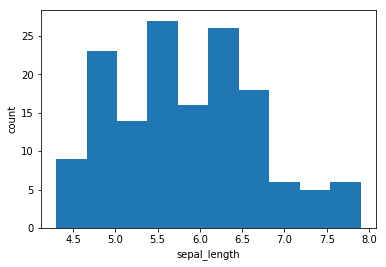

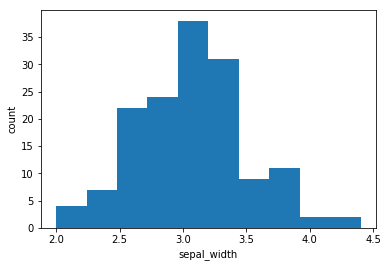

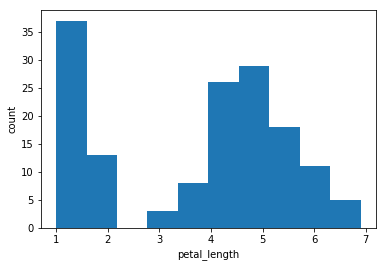

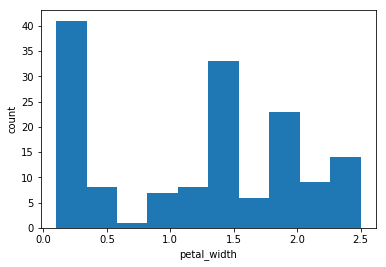

In [59]:
def draw_histogram(feature_values, feature_name):
    plt.hist(feature_values, bins=10) # draw a histogram of feature_values with 10 bins
    plt.xlabel(feature_name)  # set the x label to feature_name
    plt.ylabel('count')  # set the y label to 'count'

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']  # or iris_df.columns.values[:-1]
for feature_name in feature_names:
    plt.figure()  # this line makes each histogram use a different figure, try removing it to see what happens!
    #feature_values = ...  # get the data for a given feature_name
    feature_values = iris_df[feature_name]
    draw_histogram(feature_values, feature_name)

## Separating dataset by a value

In this classification problem, we want to find the species of a given flower given only the measurements.

When looking at the petal length and petal width histogram, we see that there seems to be two peaks (around 1.5 and around 5).

Are these peaks a good way to distinguish species? Why do we have two peaks even though we have three possible species? A good way to answer these questions is to separate the dataset by classes, to see how each class is influencing the shape of the histogram.

This section covers:

* Separating the dataset by the value of a feature ('class' in this case)
* Adding multiple data series to the same plot
* Adding a legend to a plot

In [60]:
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']  # or iris_df['class'].unique()
feature_name = 'petal_length'

true_if_setosa = iris_df['class'] == 'Iris-setosa'
only_setosa_df = iris_df.loc[true_if_setosa]
feature_values = only_setosa_df[feature_name]
print('Iris-setosa {} average: {}'.format(feature_name, feature_values.mean()))

Iris-setosa petal_length average: 1.464


The `Iris-setosa` average is indeed around 1.5!

But what are the minimum and maximum values? And how about the other classes?

### Exercise 1. Draw a separated feature histogram for each feature

1. select **only** the feature values corresponding to `cls` in `feature_values`
2. look at the histogram with all three classes
3. Plot the separated histogram of each feature
4. Make sure that the $x$ label and $y$ label are set
5. Also make sure the legend is visible

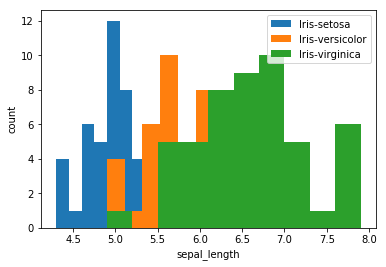

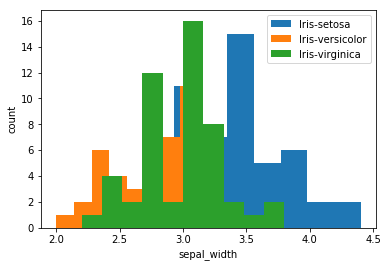

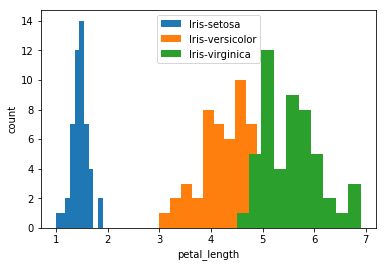

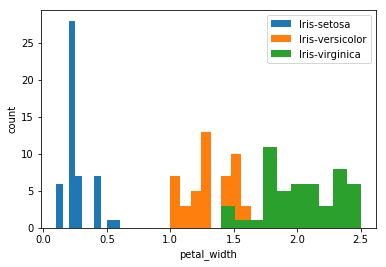

In [61]:
def only_cls_feature_values(input_df, cls, feature_name):
    return input_df.loc[input_df['class'] == cls][feature_name]

for feature_name in feature_names:
    plt.figure()  # add plots to a new figure
    for cls in classes:
        cls_fv = only_cls_feature_values(iris_df, cls, feature_name)
        draw_histogram(cls_fv, feature_name)
    plt.legend(classes)
    #plt.title(feature_name)

## Scatterplots of feature pairs

When analyzing multi dimensional data, it is sometimes interesting to see how some dimensions interact with each other. In order to do this, one possible tool is a scatter plot.

This section covers:

* Creating a scatter plot of a pair of features
* Interpreting the plot

### Scatterplots

The way to plot scatter plots with `matplotlib.pyplot` is the same as a line plot, except that we need to provide one more argument at the end, for the shape.

Here is a simple example, of the square function, using `'.'` instead of `'-'` (the default).

Other possible values include `'x'`, `'+'`, etc. (see https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot for a full list).

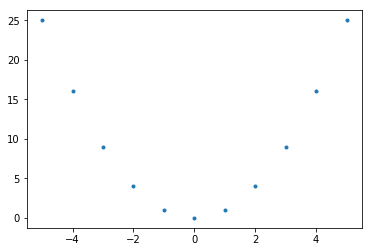

In [62]:
def square(x):
    return x ** 2

x_values = np.linspace(-5, 5, num=11)
plt.plot(x_values, square(x_values), '.');

### Exercise 2. Plot a pair of features

1. Get the `x_values` for a given class and the `x_feature` feature name
2. Same thing for `y_values`

   (hint: use `only_cls_feature_values`)
3. Plot the `x_values` against `y_values` with a the `'.'` shape

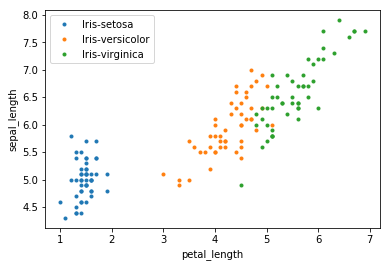

In [63]:
def scatter_plot_feature_pair(input_df, x_feature, y_feature, classes, plt=plt):
    handles = []  # used for plt.figlegend

    for cls in classes:
        x_values = only_cls_feature_values(input_df, cls, x_feature)
        y_values = only_cls_feature_values(input_df, cls, y_feature)
        axis = plt.plot(x_values, y_values, '.')
        handles.append(axis[0])

    return handles

scatter_plot_feature_pair(iris_df, 'petal_length', 'sepal_length', classes)
plt.xlabel('petal_length')
plt.ylabel('sepal_length')
plt.legend(classes);

## Scatterplot matrix

In addition to the distribution of individual features, it is also useful to visualize the relationships between features. To do so, we can create scatterplots for each pair of features, arranged in a 'matrix' layout. Furthermore, by coloring the scatterplot according to 'class', we can gain further insight into the nature of the correlations.

This section covers:

* Working with subplots

### Cheating with pandas

If you are willing to accept their default, pandas already have everything done for us (no need to use our previous functions).

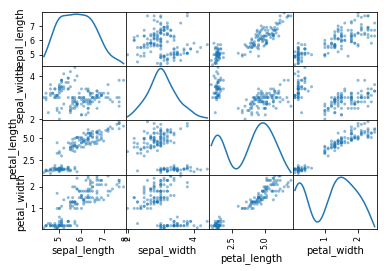

In [64]:
try:
    from pandas.plotting import scatter_matrix  # BQNT has an old version of pandas, without plotting
    scatter_matrix(iris_df, diagonal='kde')
    image = None
except:
    from IPython.display import Image
    image = Image(filename='pandas_scatter_matrix.png')

image

But this is not separated by class! No pretty colors!

The code below uses our functions to do a similar scatter matrix but separated by classes.

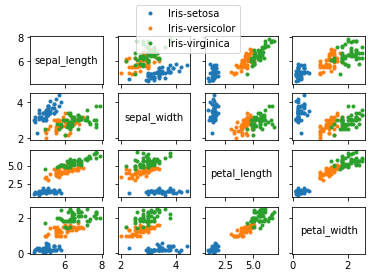

In [65]:
from itertools import combinations

def scatterplot_matrix(input_df, classes, kde_in_diagonal):
    # create the figure as a matrix of subplots, sharing x values in columns,
    # and y values in rows iff display_kde is False
    sharey = {'sharey': 'row'} if not kde_in_diagonal else {}
    _, axes_array = plt.subplots(len(feature_names), len(feature_names), sharex='col', **sharey)

    # loop over the diagonal
    # note: the enumerate(iterable) function returns tuples of (index, element) for all the elements in the iterable 
    for i, feature in enumerate(feature_names):
        # for the subplot at i,i: 
        # instead of plotting the feature against itself
        if kde_in_diagonal:
            # try implementing that function in the appendix
            plot_kde(input_df, feature, classes, axes_array[i,i])
        else:
            # display name of the feature
            plt.text(
                0.5, 0.5, feature,
                horizontalalignment='center',
                verticalalignment='center',
                transform=axes_array[i,i].transAxes
            )

    # loop over the top right half of the matrix
    # note: combinations(iterable, 2) returns all pairs of features without considering order
    #       so in our case, we have [((0, 'sepal_length'), (1, 'sepal_width')), ...]
    for (i, feature1), (j, feature2) in combinations(enumerate(feature_names), 2):
        # plot in the top right half (i, j)
        scatter_plot_feature_pair(
            input_df,
            feature2,
            feature1,
            classes,
            plt=axes_array[i,j]
        )

        # plot the mirror image in the bottom left half (j, i)
        handles = scatter_plot_feature_pair(
            input_df,
            feature1,
            feature2,
            classes,
            plt=axes_array[j,i]
        )

    plt.figlegend(handles, classes, 'upper center')

scatterplot_matrix(iris_df, classes, kde_in_diagonal=False)

# you should also try this (see appendix 3 first):
# scatterplot_matrix(iris_df, classes, kde_in_diagonal=True)

We can easily see that setosa iris measurements form a separate cluster for any two sets of features! This is not obvious from the kernel densities for sepal measurements, though it can be seen in the bimodal petal measurement kernel densities. The strongest correlation is between petal width and petal length, as shown by the strong linearity in the scatter plot, and a similar linear relationship is shared between all classes of iris. This is not the case for e.g. petal length and sepal length, which also exhibit fairly strong correlation within a class but have different linear relationships between classes. These conclusions can be used to interpret the results of clustering and regression models.

<h1> Fitting A Model </h1>

Enough warming up, let's get to it!

To prep our data for building a model, we need to split it into three main categories:

1. Training set
2. Validation set
3. Test set

This is a critical best-practice in data science to guard against overfitting!
<img src="train_test_validation_split.png" alt="Train/Validation/Test Split" style="width: 520px;"/>

Notice that below we use the `sklearn` function `train_test_split` to partition the data randomly into the three categories described above. The default train/test proportions are 75%/25%, but they can be manually configured as desired. Here we'll use 80%/20%.

Additionally, if we had discovered that our data set contained relatively few of one of the classes, we could specify `stratify=y` to make sure that each split has equal representation from all classes.  (This could be important so we don't end up with a split with 0 or very few examples from a particular class, just by random chance.)

In [66]:
from sklearn.model_selection import train_test_split

#Renaming the DataFrame to stick with popular convention
X = iris_df.copy()

# Similar to Python dictionaries, pop() removes the column from the DataFrame and returns the corresponding Series
y = X.pop('class')

X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.2)

How would you get the counts of training examples across the Iris classes?

In [67]:
# SOLUTION
y_train.to_frame().groupby('class').size().to_frame('counts')

,counts
class,
Iris-setosa,33
Iris-versicolor,33
Iris-virginica,30


<h2> Logistic Regression </h2>

Once we've loaded, cleaned, split, and visualized the data, we're ready to try fitting some machine learning models! Logistic regression, despite its name, can be viewed as a machine learning model for doing classification. Logistic regression gives us prediction functions that produce "soft classifications", namely probability distributions over class labels. To get a hard classification, we will just choose the class with the highest probability.

Scikit-Learn contains a LogisticRegression class, which can train a model on your data and make predictions. There's a link to the full spec below, but the most important methods are:

1. fit(X, y): Fits the model to the provided training data.
2. predict(X): Predicts the classification for test data. 

Full Spec: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [75]:
#Train a logistic regression model and use it to predict the species for the validation data
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_val)
y_pred
# SOLUTION 


array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

For any model, we need a way of assessing how good our predictions are. LogisticRegression has a method, score(X, y), which returns the mean accuracy, or the percent of samples correctly classified, on the given test data and provided labels. It first uses the trained model to predict the classes for the samples in X, then compares those to the true classes in y. 

In [78]:
#Output the score of your model on your validation set
log_reg.score(X_val, y_val)
# SOLUTION


1.0

<h2> Confusion Matrix </h2>

Logistic regression appears to do a pretty good job of classifying the samples by species. We may want to look more carefully at where the classifier succeeded and where it failed. Doing so can illuminate similarities between classes or suggest the need for additional features to help the model differentiate between classes. 

One tool for understanding the success of a classifier is a confusion matrix, which breaks down the predicted classifications by true class: for each true class, it shows how many samples were predicted to be in each possible class. Pandas contains a tool, crosstab, for creating them.

In [79]:
# check if this logistic regression model has been fit
if hasattr(log_reg, 'coef_') and log_reg.coef_ is not None:
    predictions = log_reg.predict(X_val)
    print(pd.crosstab(y_val, predictions, rownames = ['True Class'], colnames= ['Predicted Class'] ))

Predicted Class  Iris-setosa  Iris-versicolor  Iris-virginica
True Class                                                   
Iris-setosa                7                0               0
Iris-versicolor            0                6               0
Iris-virginica             0                0              11


<h2> Hyperparameters </h2>

Recall that <b> hyperparameters </b> are parameters of the machine learning model itself that can be adjusted to produce a better fitting model. One of the most important applications of hyperparameters is in <b> regularization </b>, a technique to help avoid overfitting. Regularization essentially sacrifices the "best" model for the training data in return for a model that can generalize better to test data. 

One form of regularization works by penalizing models that have coefficients that are "too big". For example, in a linear model $y = a_1 x + a_2$, we might want to avoid models that have very steep slopes or very large intercepts. Controlling $a_1$ and $a_2$ allows us to do so. 

Two forms of regularization are commonly used for Logistic Regression: l1 and l2 (pronounced "ell 1" and "ell 2")
1. In l2 regularization, we control the size of the coefficients by penalizing the model for having a large sum of squared coefficients (eg, $a_1^2 + a_2^2$). This is the default regularization in Scikit-Learn's LogisticRegression.  
3. In l1 regularization, we control the size of the coefficients by penalizing the model for having a large sum of the absolute value of the coefficients (eg, $|a_1| + |a_2|$). l1 regularization favors "sparse solutions". A sparse solution is when one or more of the feature weights is 0. The more l1 regularization we have, the sparser the solution we get. For this reason, l1 regularization can be used for feature selection.

To try different types of regularization in Scikit-Learn, you need to initialize LogisticRegression with two parameters:

1. penalty: Type of regularization; a string, either 'l1' or 'l2'
2. C: The inverse of regularization strength; a positive float that determines how much to penalize the model for large coefficients. Note that since it's the inverse, smaller values of C mean a more regularized model (i.e. smaller coefficients). 

In [89]:
# Try some different combinations of C and penalty and see how they affect the score on the validation set. 
log_reg = LogisticRegression(C=0.1, penalty='l2')
log_reg.fit(X_train, y_train)
if hasattr(log_reg, 'coef_') and log_reg.coef_ is not None:
    predictions = log_reg.predict(X_val)
    print(pd.crosstab(y_val, predictions, rownames = ['True Class'], colnames= ['Predicted Class'] ))
# SOLUTION


Predicted Class  Iris-setosa  Iris-versicolor  Iris-virginica
True Class                                                   
Iris-setosa                7                0               0
Iris-versicolor            0                4               2
Iris-virginica             0                0              11


<h2> Using GridSearch for hyperparameter tuning </h2>

Scikit-Learn has a tool to make this kind of hyperparameter tuning easier. 

Recall that cross validiation is another technique for assessing the quality of a model. Instead of splitting the training data once into a test set and a validation set, in cross validation, the data is divided into $n$ subsets, called folds, and the model is trained $n$ times, each time witholding a different fold to use as the validation set. 

<img src="cross_validation_split.png" alt="Cross Validation" style="width: 717px;"/>

Cross validation can be helpful for small datasets, since every data point is used to assess the model performance, rather than just a fixed subset.

In Scikit-Learn, GridSearchCV is used to accomplish this kind of parameter tuning. Given a Scikit-Learn estimator object (eg, LogisticRegression), a dictionary listing all the parameters to try, and a scoring method, GridSearchCV will train a model for every parameter combination and show the score for every combination. 

Once GridSearchCV has fit the model, you can access cv\_results\_, a matrix of results, as well as best\_estimator\_, best\_score\_, and others. See http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html for full details. 

Since we are working on a classification problem, we will use accuracy as our scoring method, but GridSearchCV (and Scikit-Learn) supports many other types of scores, assuming they're supported by the estimator object. See http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter for a complete list. 

In [90]:
#Using GridSearchCV, train models on for a wide variety of hyperparameters

from sklearn.model_selection import GridSearchCV
param_grid = [{'C':[1e-5, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0], 'penalty':['l1', 'l2']}]
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', return_train_score=False)
grid_search.fit(X_train_all, y_train_all)
results = pd.DataFrame(grid_search.cv_results_)

#There's lots of data in the results dataframe - we'll just look at a few columns here, but feel free to explore
results[["param_C","param_penalty", "mean_test_score", "rank_test_score"]]

,param_C,param_penalty,mean_test_score,rank_test_score
0,1e-05,l1,0.333333,17
1,1e-05,l2,0.341667,14
2,0.0001,l1,0.333333,17
3,0.0001,l2,0.341667,14
4,0.001,l1,0.333333,17
5,0.001,l2,0.341667,14
6,0.01,l1,0.325000,20
7,0.01,l2,0.675000,13
8,0.1,l1,0.700000,12
9,0.1,l2,0.816667,11


<h2> Trying other models </h2>

Logistic Regression is a very common basic classification algorithm, but there are others you can also try. 

<h3>K Nearest Neighbors </h3>
In K Nearest Neighbors classification, the prediction function identifies the K "nearest neighbors" to an input feature vector, and predicts the most frequently occurring class among those neighbors. The nearest neighbors are typically found using the standard euclidean distance, though any other similarity score may be used instead.The K in K nearest neighbors is a hyperparameter: small values of K will provide a more flexible, granular fit, but will be sensitive to noise. Larger values of K will be more resilient to noise but less likely to pick up small variations in the boundaries. 


To implement a K Nearest Neighbors model, use Scikit-Learn's KNeighborsClassifier. Initialize it with n\_neighbors and 
then fit, predict, and score your model just like LogisticRegression. For more details, see http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [113]:
# Try out K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier 
#Try out KNN with hp tuning
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_neighbors':np.arange(1,10,1)}]
KNN_model = KNeighborsClassifier()
grid_search = GridSearchCV(KNN_model, param_grid, cv=5, scoring='accuracy', return_train_score=False)
grid_search.fit(X_train_all, y_train_all)
results = pd.DataFrame(grid_search.cv_results_)
#There's lots of data in the results dataframe - we'll just look at a few columns here, but feel free to explore
results[["param_n_neighbors", "mean_test_score", "rank_test_score"]]

KNN_model_opt = KNeighborsClassifier(n_neighbors = 3)
KNN_model_opt.fit(X_train, y_train)
predictions = KNN_model_opt.predict(X_val)
print(pd.crosstab(y_val, predictions, rownames = ['True Class'], colnames= ['Predicted Class'] ))
# SOLUTION


Predicted Class  Iris-setosa  Iris-versicolor  Iris-virginica
True Class                                                   
Iris-setosa                7                0               0
Iris-versicolor            0                6               0
Iris-virginica             0                0              11


<h3> Random Forest Classifier </h3>

Random forest is an aggregation of another type of model, decision trees. A decision tree uses a series of decisions to try to classify a sample. For example, possible decision tree logic could be: 

If sepal length is less than 4.5, classify as versicolor. If sepal length is greater than 4.5, then look at petal length; if petal length is greater than 1.5, classify as setosa, otherwise classify as virginica. 

In Random Forest classification, many decision trees are built on the data, and each will be different because of some randomness introduced in the tree-building process. These trees then all "vote" on the classification of an input. One benefit of random forest models is insight into feature selection, since the multiple trees can generate data about which features are most relevant to each decision. 

In Scikit-Learn, use RandomForestClassifier to implement a Random Forest model. Initialize it with n\_estimators, the number of trees in the forest. It is also helpful to initialize the random_state so you can reproduce your model. Fit, predict, and score work as they do for the other estimators, but you can also take a look at feature\_importances\_ to see which features are most important in your model. See the docs at http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [114]:
# Try out Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42, n_estimators=20)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_val)
print(pd.crosstab(y_val, predictions, rownames = ['True Class'], colnames= ['Predicted Class'] ))
# SOLUTION


Predicted Class  Iris-setosa  Iris-versicolor  Iris-virginica
True Class                                                   
Iris-setosa                7                0               0
Iris-versicolor            0                5               1
Iris-virginica             0                1              10


/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<h2> Comparing Between Models </h2>

With three different models, all with pretty good performance, we need some way to choose the best. Because the dataset is so small, looking at the score on the validation set is very sensitive to variations in how the data was split. Cross validation will be helpful here; training and scoring the different models on different folds of the data will give us a better sense of overall performance. 

GridSearchCV is written for only one model. We can get around that by writing a wrapper class that takes the model we want to use as a hyperparameter. GridSearchCV will be able to use our wrapper as long as we provide the standard API. 

In [115]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class CrossValidationModelWrapper(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our classifiers"""
     
    def __init__(self, model='LogisticRegression', n_neighbors=20, n_estimators=20, C=1, penalty='l2'):        
        self.model = model
        self.n_neighbors = n_neighbors
        self.n_estimators = n_estimators
        self.C = C
        self.penalty = penalty 

    def fit(self, X, y=None):
        if (self.model == "LogisticRegression"):
            self.classifier = LogisticRegression(C=self.C, penalty=self.penalty)
        elif (self.model == "KNeighborsClassifier"):
            self.classifier = KNeighborsClassifier(n_neighbors = self.n_neighbors)
        elif (self.model == "RandomForestClassifier"):
            self.classifier = RandomForestClassifier(random_state=42, n_estimators=self.n_estimators)
        else:
            raise ValueError('Unrecognized Classifier')
        
        self.classifier.fit(X, y)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "classifier")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.classifier.predict(X))

    def score(self, X, y=None):
        return(self.classifier.score(X, y)) 
    

We can now use this wrapper to perform GridSearch. Customize the parameters in the parameter grid below to find the optimal sets of hyperparameters.

In [120]:
param_grid = [{'model': ['LogisticRegression'], 'C': [0.1, 1.0, 10.0], 'penalty':['l1', 'l2'] }, 
              {'model': ['KNeighborsClassifier'], 'n_neighbors': [1, 3, 5, 6, 8, 10]},
              {'model': ['RandomForestClassifier'], 'n_estimators':[5, 10, 15, 20, 25]}]
cv_wrapper = CrossValidationModelWrapper()
grid_search = GridSearchCV(cv_wrapper, param_grid, cv=5, scoring='accuracy', return_train_score=False)
grid_search.fit(X_train_all, y_train_all)
results = pd.DataFrame(grid_search.cv_results_)
results[["param_model", "param_n_neighbors", "param_n_estimators", 
         "param_C","param_penalty", "mean_test_score", "rank_test_score"]].fillna('-')

,param_model,param_n_neighbors,param_n_estimators,param_C,param_penalty,mean_test_score,rank_test_score
0,LogisticRegression,-,-,0.1,l1,0.691667,17
1,LogisticRegression,-,-,0.1,l2,0.791667,16
2,LogisticRegression,-,-,1,l1,0.950000,14
3,LogisticRegression,-,-,1,l2,0.950000,14
4,LogisticRegression,-,-,10,l1,0.958333,10
5,LogisticRegression,-,-,10,l2,0.975000,4
6,KNeighborsClassifier,1,-,-,-,0.975000,4
7,KNeighborsClassifier,3,-,-,-,0.983333,1
8,KNeighborsClassifier,5,-,-,-,0.983333,1
9,KNeighborsClassifier,6,-,-,-,0.983333,1


<h2> Train and test your final model! </h2>

Choose your best performing model from above and use it to predict the species of your test data.

In [121]:
# SOLUTION
KNN_model_opt = KNeighborsClassifier(n_neighbors = 3)
KNN_model_opt.fit(X_train, y_train)
predictions = KNN_model_opt.predict(X_val)
print(pd.crosstab(y_val, predictions, rownames = ['True Class'], colnames= ['Predicted Class'] ))

Predicted Class  Iris-setosa  Iris-versicolor  Iris-virginica
True Class                                                   
Iris-setosa                7                0               0
Iris-versicolor            0                6               0
Iris-virginica             0                0              11


## Appendix 1: Numpy

In [122]:
def load_csv(path, loader=lambda x: open(x).read(), **kwargs):
    return loader(path, **kwargs)

iris_text = load_csv(iris_csv_path)

In [123]:
iris_text[:200]

'sepal_length,sepal_width,petal_length,petal_width,class\n5.1,3.5,1.4,0.2,Iris-setosa\n4.9,3.0,1.4,0.2,Iris-setosa\n4.7,3.2,1.3,0.2,Iris-setosa\n4.6,3.1,1.5,0.2,Iris-setosa\n5.0,3.6,1.4,0.2,Iris-setosa\n5.4,'

Obviously, this format is not going to be very easy to work with! 

Our next thought might be to parse the csv into a list of lists, but using the popular library `numpy`, we can do even better. The following code loads the csv into an n-dimensional array, called an `ndarray` in numpy parlance. 

This data structure is similar in principal to python's native lists, but are faster, more memory efficient, and have some handy additional features.

In [124]:
def array_loader(path, **kwargs):
    return np.genfromtxt(path, delimiter=',', autostrip=True, **kwargs)

iris_ndarray = load_csv(iris_csv_path, loader=array_loader, names=True, dtype=None)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


In [125]:
iris_ndarray[:10]

array([(5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
       (4.9, 3. , 1.4, 0.2, 'Iris-setosa'),
       (4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
       (4.6, 3.1, 1.5, 0.2, 'Iris-setosa'),
       (5. , 3.6, 1.4, 0.2, 'Iris-setosa'),
       (5.4, 3.9, 1.7, 0.4, 'Iris-setosa'),
       (4.6, 3.4, 1.4, 0.3, 'Iris-setosa'),
       (5. , 3.4, 1.5, 0.2, 'Iris-setosa'),
       (4.4, 2.9, 1.4, 0.2, 'Iris-setosa'),
       (4.9, 3.1, 1.5, 0.1, 'Iris-setosa')],
      dtype=[('sepal_length', '<f8'), ('sepal_width', '<f8'), ('petal_length', '<f8'), ('petal_width', '<f8'), ('class', 'S15')])

In [126]:
iris_ndarray.shape

(150,)

An important point to note is that the `ndarray` is a homogenous data-structure. Since our CSV has both floats and strings, `numpy` gives us a one-dimensional array where each row is a tuple!

One solution is to encode the the classes as floats:

In [127]:
def class_converter(flower_class):
    classes = [b'Iris-setosa', b'Iris-versicolor', b'Iris-virginica']
    return float(classes.index(flower_class))

iris_ndarray = load_csv(iris_csv_path, loader=array_loader, skip_header=1, converters={4: class_converter})

In [128]:
iris_ndarray[:10]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ]])

In [129]:
iris_ndarray.shape

(150, 5)

When doing matrix operations, it is often to transpose some of the inputs. `numpy` makes this easy (compare these values to those from the first column above):

In [130]:
iris_ndarray.transpose()[0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

## Appendix 2: Pandas

Here's an example of leveraging data labels in order to merge two `Series` into a `DataFrame`

In [131]:
ibm_eod_prices = [159.55, 155.88, 153.50, 153.60, 154.36, 154.06]
ibm_dates = pd.DatetimeIndex(['2017-10-23', '2017-10-24', '2017-10-25', '2017-10-26', '2017-10-30', '2017-10-31'])
ibm_series = pd.Series(ibm_eod_prices, index=ibm_dates)

In [132]:
# mix up the dates a little
aapl_eod_prices = [156.17, 157.10, 156.41, 163.05, 166.72, 169.04]
aapl_dates = pd.DatetimeIndex(['2017-10-23', '2017-10-24', '2017-10-25', '2017-10-27', '2017-10-30', '2017-10-31'])
aapl_series = pd.Series(aapl_eod_prices, index=aapl_dates)

In [133]:
pd.DataFrame({'IBM': ibm_series, 'AAPL': aapl_series})

,AAPL,IBM
2017-10-23,156.17,159.55
2017-10-24,157.10,155.88
2017-10-25,156.41,153.50
2017-10-26,NaN,153.60
2017-10-27,163.05,NaN
2017-10-30,166.72,154.36
2017-10-31,169.04,154.06


Often the dataframe requires some preprocessing before it's suitable in a model

In [134]:
iris_features_copy = iris_df.drop('class', axis=1)

In [135]:
iris_features_copy['sepal_interaction'] = iris_features_copy. \
    apply(lambda sample: sample['sepal_length'] * sample['sepal_width'], axis=1)

In [136]:
iris_features_copy.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_interaction
0,5.1,3.5,1.4,0.2,17.85
1,4.9,3.0,1.4,0.2,14.70
2,4.7,3.2,1.3,0.2,15.04
3,4.6,3.1,1.5,0.2,14.26
4,5.0,3.6,1.4,0.2,18.00


## Appendix 3: Kernel density plot

The histogram produced in the previous section was a good start. However, the shape of the histogram can be sensitive to the number of bins, so it is hard to say if this distribution is really multi-modal (i.e. multiple peaks), or if we have simply chosen an inconvenient bin size. Furthermore, for some features (like sepal length and width) the histograms overlap, so it's hard to read. An alternative way to visualize the distribution of a feature is to use a kernel density estimate, which estimates the probability density function of the feature values (using a Gaussian kernel in this case). This section covers:

* Creating a kernel density estimate of the distribution of a feature
* Creating a line plot
* Interpreting the plot

### Line plots

Simply pass an array of $x$ values and its corresponding $y$ values to `plt.plot` to draw a line plot.

In [137]:
x_values = np.linspace(-5, 5, num=11)  # array of 11 numbers, from -5 to 5, evenly spaced
x_values

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [138]:
def square(x):
    return x ** 2

y_values = square(x_values)
y_values

array([25., 16.,  9.,  4.,  1.,  0.,  1.,  4.,  9., 16., 25.])

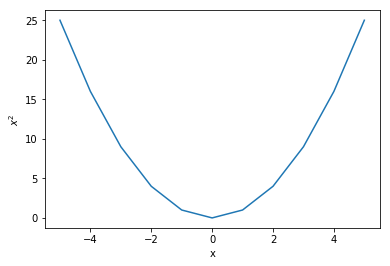

In [139]:
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('$x^2$');

### Kernel density

In order to plot a kernel density estimate instead of a histogram, we need to use `scipy.stats.gaussian_kde`.

This function needs:

1. the one-dimensional data whose density we want to estimate
2. the kernel width of the gaussian to apply

It returns a function that returns the estimated probability density for a given value.

### Exercise: Kernel density estimates separated by classes

1. Replace the `...` with code to plot the KDE (kernel density estimate) of the given `feature_name`.
2. Create a new cell to see what the density is for each feature (looping over `feature_names`):
   
   which feature seems to be the best for discriminating species? Which is the worst?

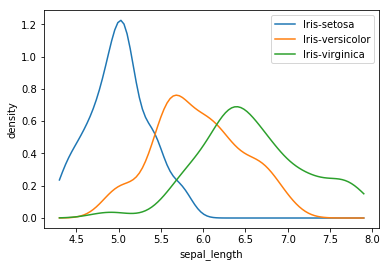

In [155]:
import scipy.stats as stats

def plot_kde(input_df, feature_name, classes, plt=plt):
    # prepare the kernel density estimate parameters
    min_val = input_df[feature_name].min()
    max_val = input_df[feature_name].max()
    # perform a rough estimate for an appropriate kernel width (alternatively, accept the default)
    kernel_width = (max_val - min_val) / 10
    # generate the feature values at which to estimate the density
    x_values = np.linspace(min_val, max_val, num=100)
    plt.figure()
    
    # extract the data by class
    for cls in classes:
        # get the feature values corresponding to the current class
        feature_values = only_cls_feature_values(input_df, cls, feature_name)
        # perform the kernel density estimate
        kernel = stats.gaussian_kde(feature_values, bw_method=kernel_width)
        # evaluate the density at our pre-selected feature values
        density = kernel(x_values)
        # add a line plot of the density estimate to the current figure
        plt.plot(x_values, density)  # plot the density of x_values

feature_name = 'sepal_length'
plot_kde(iris_df, feature_name, classes)

# format the plot
plt.xlabel(feature_name)
plt.ylabel('density')
plt.legend(classes);

From these kernel density estimate plots, it seems that each class may have a different `sepal_length` distribution.  Perhaps we can use `sepal_length` to help predict the correct class.  At the very least, it seems like it could be used to help distinguish iris-setosa from iris-virginica: in most cases, if `sepal_length > 5.6` then the class is more likely to be iris-virginica than iris-setosa.